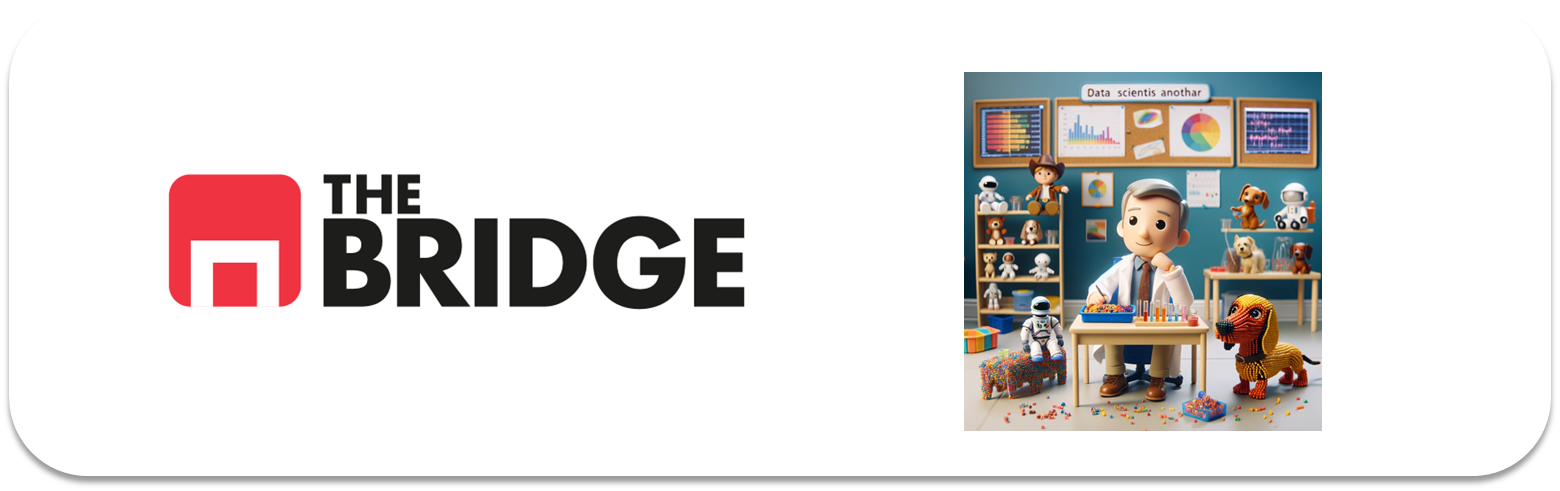

## PRACTICA OBLIGATORIA: ANÁLISIS UNIVARIANTE

* La práctica obligatoria de esta unidad consiste en hacer el análisis univariante completo de un dataset con el que acabarás muy familiarizado, el manifiesto de pasajeros del Titanic. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook. Te dejo una que vas a necesitar sí o sí

In [1]:

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd




In [125]:
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [142]:
def plot_combined_graphs(df, columns, whisker_width=1.5):
    num_cols = len(columns)
    if num_cols:
        
        fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
        print(axes.shape)

        for i, column in enumerate(columns):
            if df[column].dtype in ['int64', 'float64']:
                # Histograma y KDE
                sns.histplot(df[column], kde=True, ax=axes[i,0] if num_cols > 1 else axes[0])
                if num_cols > 1:
                    axes[i,0].set_title(f'Histograma y KDE de {column}')
                else:
                    axes[0].set_title(f'Histograma y KDE de {column}')

                # Boxplot
                sns.boxplot(x=df[column], ax=axes[i,1] if num_cols > 1 else axes[1], whis=whisker_width)
                if num_cols > 1:
                    axes[i,1].set_title(f'Boxplot de {column}')
                else:
                    axes[1].set_title(f'Boxplot de {column}')

        plt.tight_layout()
        plt.show()


In [127]:
def plot_histo_dens(df, columns, bins=None):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            if bins:
                sns.histplot(df[column], kde=True, ax=axes[i], bins=bins)
            else:
                sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

### #1 Preparación


### #1.1


Carga en un dataframe los datos del titanic a partir de un dataset de seaborn. Para ello:

* ejecuta ```python sns.get_dataset_names()```
* localiza el nombre que puede ser el adecuado para el ejercicio
* Asigna la salida de ```sns.load_dataset(<nombre_del_dataset>)``` a una variable "df_titanic"

In [8]:
sns.get_dataset_names()

''' 
sns.get_dataset_names() es parte de la biblioteca Seaborn, que es una biblioteca de visualización de datos en Python construida sobre Matplotlib. 
Esta función devuelve una lista de los conjuntos de datos integrados que están disponibles para su uso con Seaborn. Estos conjuntos de datos son 
útiles para propósitos de demostración, pruebas y ejemplos. Pueden incluir conjuntos de datos que se utilizan comúnmente en la comunidad de 
visualización de datos para ilustrar diferentes técnicas y métodos de visualización.

La función sns.get_dataset_names() de Seaborn proporciona acceso directo a conjuntos de datos integrados que están disponibles en la biblioteca. 
Estos conjuntos de datos ya están incluidos en Seaborn y se pueden utilizar directamente sin necesidad de importarlos o cargarlos manualmente 
desde archivos externos. Esto hace que sea conveniente para los usuarios explorar y practicar con diferentes conjuntos de datos sin tener que 
buscar y descargar conjuntos de datos por separado.
'''

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [52]:
df_titanic = sns.load_dataset('titanic')
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### #1.2

Muestra una porción del dataset ("df_titanic") y su info general. ¿Hay nulos?

In [21]:
df_titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [24]:
''' 
A simple vista vemos que sí, hay nulos en la columna deck y age. Podríamos acabar de comprobarlo con otras funciones.
'''
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
'''
df_titanic tiene 891 rows. Vemos que las siguientes columnas nº rows < 891, por tanto, tienen nulos:
- age
- embarked
- deck
- embark_town
'''

### #1.3

Obtén el porcentaje de nulos y decide que hacer con las columnas con nulos y ejecútalo. Además deshazte de la columna "parch" que no la emplearemos.

In [37]:
lista_nulos = ['age','embarked','deck','embark_town']

for i in range(len(lista_nulos)):
    columna = lista_nulos[i]
    no_nulos = df_titanic[columna].count()
    porcentaje_no_nulos = ((891-no_nulos)/891*100).round(2)
    print(f'El porcentaje de nulos para la columna {columna} es de {porcentaje_no_nulos}%')

    

El porcentaje de nulos para la columna age es de 19.87%
El porcentaje de nulos para la columna embarked es de 0.22%
El porcentaje de nulos para la columna deck es de 77.22%
El porcentaje de nulos para la columna embark_town es de 0.22%


In [53]:
df_titanic = df_titanic.drop(['parch'], axis = 1)
df_titanic

,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [61]:
'''
PRIMERO: analisis embarked y embark_town
embarked y embark_town creo que podrían estar relacionadas. Voy a comprobarlo
'''
df_embark = df_titanic[['embarked','embark_town', 'alive']]
df_embark

,embarked,embark_town,alive
0,S,Southampton,no
1,C,Cherbourg,yes
2,S,Southampton,yes
3,S,Southampton,yes
4,S,Southampton,no
...,...,...,...
886,S,Southampton,no
887,S,Southampton,yes
888,S,Southampton,no
889,C,Cherbourg,yes


In [64]:
'''Coincide la relación embarked - embark_town, es decir, si en embarked hay un NaN, en embark_town también. O sea, sustituir un valor no podremos. E inventarlo, tampoco'''
df_embark.value_counts()


embarked  embark_town  alive
S         Southampton  no       427
                       yes      217
C         Cherbourg    yes       93
                       no        75
Q         Queenstown   no        47
                       yes       30
Name: count, dtype: int64

In [75]:
'''Los que no embarcaron están alive, así que blanco y en botella.'''

for i in range(len(df_embark)):
    if pd.isnull(df_embark['embarked'].iloc[i]):
        print(i, df_titanic.iloc[i])


61 survived            1
pclass              1
sex            female
age              38.0
sibsp               0
fare             80.0
embarked          NaN
class           First
who             woman
adult_male      False
deck                B
embark_town       NaN
alive             yes
alone            True
Name: 61, dtype: object
829 survived            1
pclass              1
sex            female
age              62.0
sibsp               0
fare             80.0
embarked          NaN
class           First
who             woman
adult_male      False
deck                B
embark_town       NaN
alive             yes
alone            True
Name: 829, dtype: object


In [84]:
'''CONCLUSIONES embark y embark_town
Eliminamos las filas que contienen NaN en 'embarked' y 'embark_town', ya que son personas que no subieron al titanic
'''
df_titanic_clean = df_titanic.dropna(subset=['embarked']) #Selección solo las filas que no tienen valores nulos en la columna 'embarked'
df_titanic_clean #ahora tendremos 889 filas


,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [88]:
'''SEGUNDO: El porcentaje de nulos para la columna deck es de 77.22%
Primero, veamos si podría tener relación con class'''

df_deck = df_titanic_clean[['deck','class']]
df_deck.value_counts()



deck  class 
C     First     59
B     First     45
D     First     29
E     First     25
A     First     15
F     Second     8
      Third      5
D     Second     4
E     Second     4
G     Third      4
E     Third      3
Name: count, dtype: int64

In [90]:
'''No exactamente. veo que deck = E pertenece a First, Second & Third. No convence mucho esta relación.
Ante tal porcentaje de nulos y sin ver relaciones claras entre columnas, mejor eliminarla'''

df_titanic_clean2 = df_titanic_clean.drop('deck', axis=1)
df_titanic_clean2

,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [121]:
'''ÚLTIMO: El porcentaje de nulos para la columna age es de 19.87%.
Haremos una media por sexo y sustituiremos los valores NaN por esta media'''

df_sex_age = df_titanic_clean2[['sex','age']]

df_sex_age_male = df_sex_age[df_sex_age['sex'] == 'male']
mean_male = df_sex_age_male.describe().loc['mean']

df_sex_age_female = df_sex_age[df_sex_age['sex'] == 'female']
mean_female = df_sex_age_female.describe().loc['mean']

df_titanic_clean3 = df_titanic_clean2.copy()

for i in range(len(df_titanic_clean3)):
    if df_titanic_clean3.iloc[i,2] == 'male' and pd.isnull(df_titanic_clean2.iloc[i,3]):
        df_titanic_clean3.iloc[i,3] = mean_male
    elif df_titanic_clean3.iloc[i,2] == 'female' and pd.isnull(df_titanic_clean2.iloc[i,3]):
        df_titanic_clean3.iloc[i,3] = mean_female
df_titanic_clean3


,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.000000,1,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.000000,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.000000,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,27.745174,1,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.000000,0,30.0000,C,First,man,True,Cherbourg,yes,True


### #1.4
Sobre el dataset "limpio". Rellena la tabla de descripción (muy breve) de lo que es cada columna en función de su nombre y los valores. Para ayudarte:
* Se trata del dataset que reune lo más parecido a un manifiesto de supervivientes y fallecidos en el viaje.
* sibsp: Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)
* embarked: Es la incial de la letra de la ciudad donde embarcó la persona.



| Columna/Variable | Descripción |
| ---------------- | ----------- |
| survived         | Pasajero superviviente (1) o pasajero no superviviente (0) |
| pclass           | Clase del pasaje |
| sex              | Género del pasajero |
| age              | Edad del pasajero |
| sibsp            | Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros) |
| fare             | Precio del embarque |
| embarked         | Inicial de donde embarcó la persona (relación con columna embark_town) |
| class            | Clase del pasaje |
| who              | Genero del pasajero |
| adult_male       | Indica si el pasajero es un hombre |
| deck             | Cubierta del barco |
| embark_town      | Ciudad de embarque  |
| alive            | Pasajero vivo ('yes') o muerto ('no') |
| alone            | Indica si el pasajero viajaba solo |





### #1.5

Busca en internet las tres ciudades que visitó el Titanic antes de poner rumbo a su destino y llegar a alta mar. Cambia las iniciales por esos valores.

In [124]:
df_titanic_clean3["embarked"] = df_titanic_clean3["embark_town"] #las tres del embark_town
df_titanic_clean3

,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,7.2500,Southampton,Third,man,True,Southampton,no,False
1,1,1,female,38.000000,1,71.2833,Cherbourg,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.000000,0,7.9250,Southampton,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,53.1000,Southampton,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,8.0500,Southampton,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,13.0000,Southampton,Second,man,True,Southampton,no,True
887,1,1,female,19.000000,0,30.0000,Southampton,First,woman,False,Southampton,yes,True
888,0,3,female,27.745174,1,23.4500,Southampton,Third,woman,False,Southampton,no,False
889,1,1,male,26.000000,0,30.0000,Cherbourg,First,man,True,Cherbourg,yes,True


### #2 Análisis

Sabiendo que el objetivo de nuestro análisis es hacer un estudio de la superviviencia y mortalidad en el viaje... Haz un análisis univariante completo y ordenado de las siguientes variables:
["survived","who","age","fare","class","embarked","alone"]
Nota: Si quieres añadir más, perfecto.

Separa el análisis en categóricas (incluyendo binarias) y numéricas. Muestra valores, gráficas y conclusiones/observaciones (2 o 3 por variable)

In [128]:
# usamos la función de los ejercicios
def card_tipo(df,umbral_categoria = 10, umbral_continua = 30):

    df_temp = pd.DataFrame([df.nunique(), df.nunique()/len(df) * 100, df.dtypes]) 
    df_temp = df_temp.T 
    df_temp = df_temp.rename(columns = {0: "Card", 1: "%_Card", 2: "Tipo"}) 

    # Corrección para cuando solo tengo un valor
    df_temp.loc[df_temp.Card == 1, "%_Card"] = 0.00

    df_temp["tipo_sugerido"] = "Categorica"
    df_temp.loc[df_temp["Card"] == 2, "tipo_sugerido"] = "Binaria"
    df_temp.loc[df_temp["Card"] >= umbral_categoria, "tipo_sugerido"] = "Numerica discreta"
    df_temp.loc[df_temp["%_Card"] >= umbral_continua, "tipo_sugerido"] = "Numerica continua"


    return df_temp

In [130]:
card_tipo(df_titanic_clean3)

,Card,%_Card,Tipo,tipo_sugerido
survived,2,0.224972,int64,Binaria
pclass,3,0.337458,int64,Categorica
sex,2,0.224972,object,Binaria
age,90,10.123735,float64,Numerica discreta
sibsp,7,0.787402,int64,Categorica
fare,247,27.784027,float64,Numerica discreta
embarked,3,0.337458,object,Categorica
class,3,0.337458,category,Categorica
who,3,0.337458,object,Categorica
adult_male,2,0.224972,bool,Binaria


In [134]:
categoricas = ["survived","who","class","embarked","alone"]
numericas = ["age","fare"]


### #2.1 Categóricas

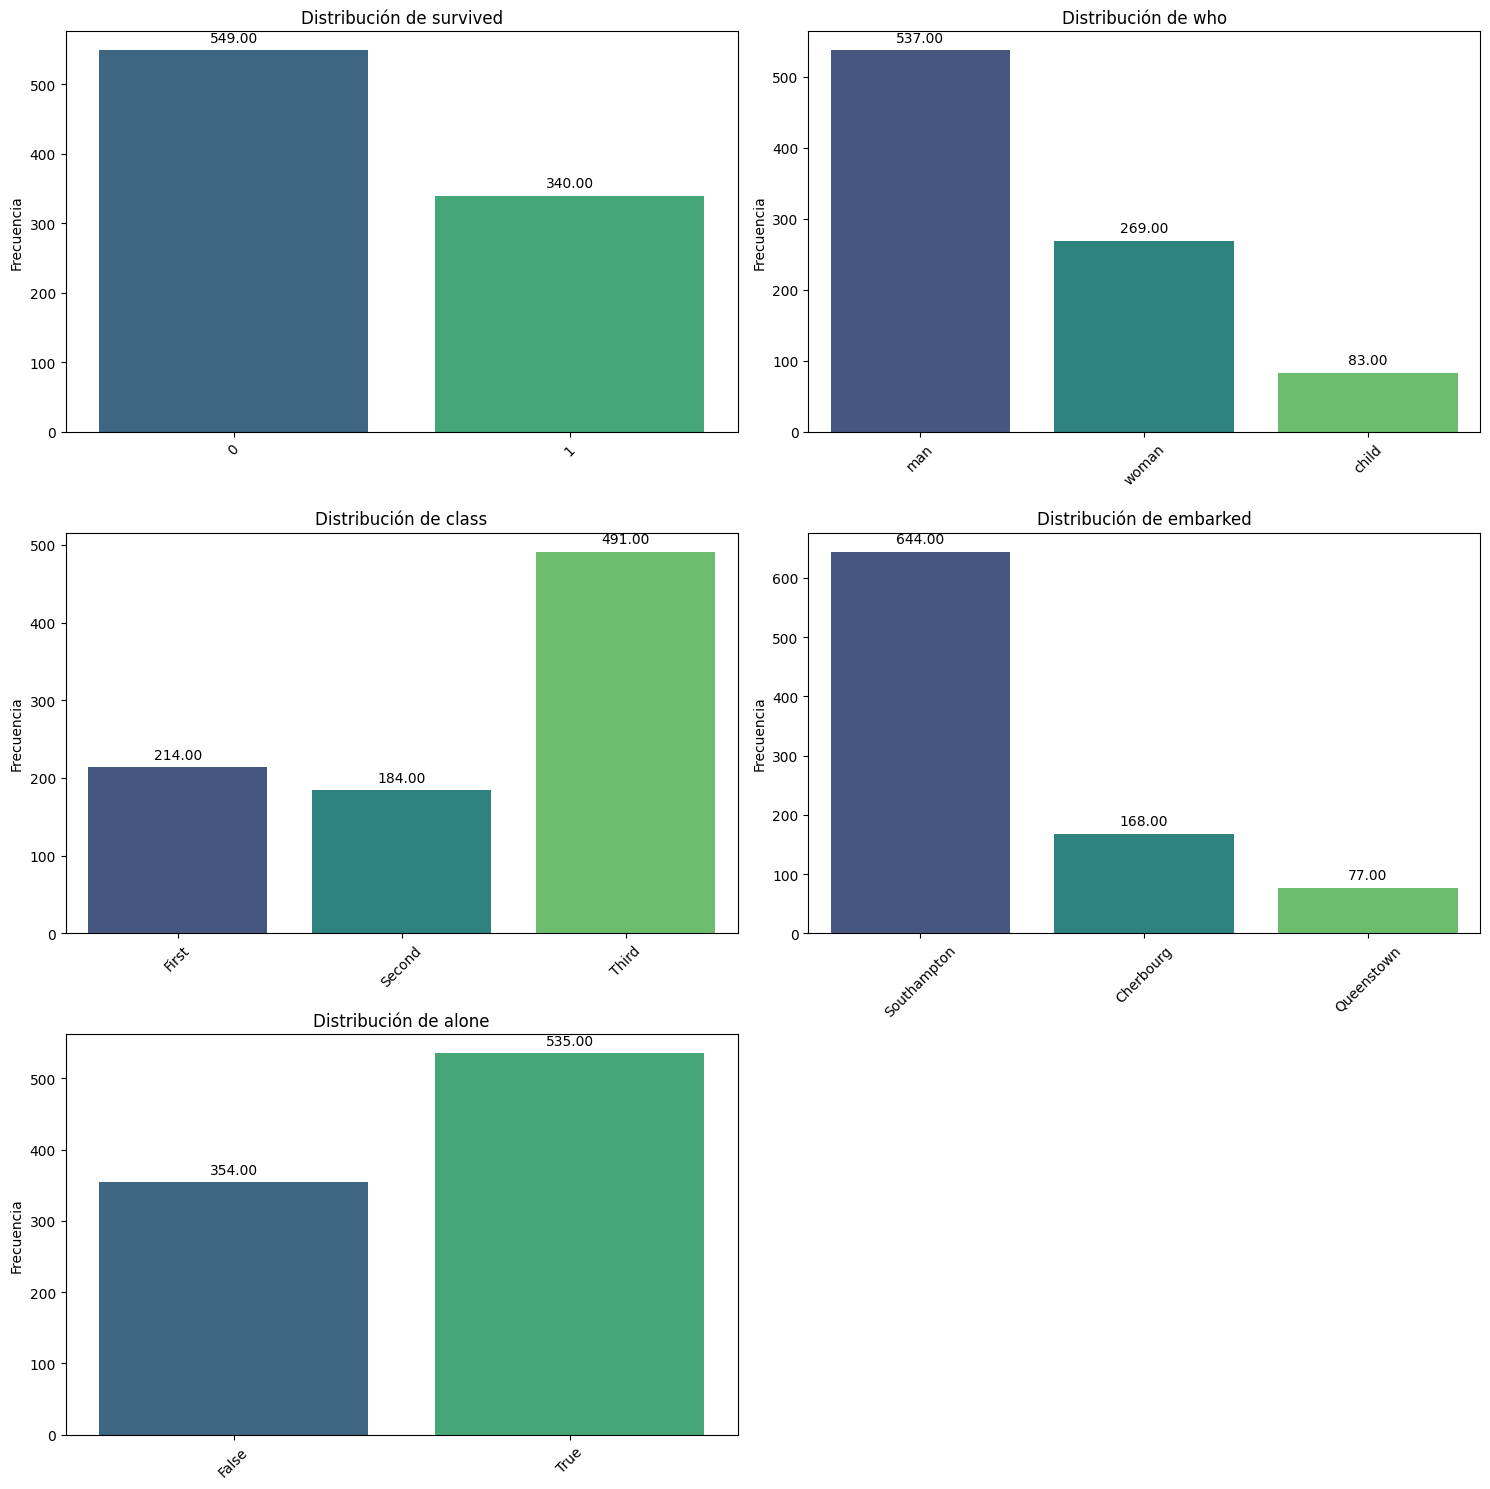

In [138]:
pinta_distribucion_categoricas(df_titanic_clean3, categoricas, mostrar_valores= True)

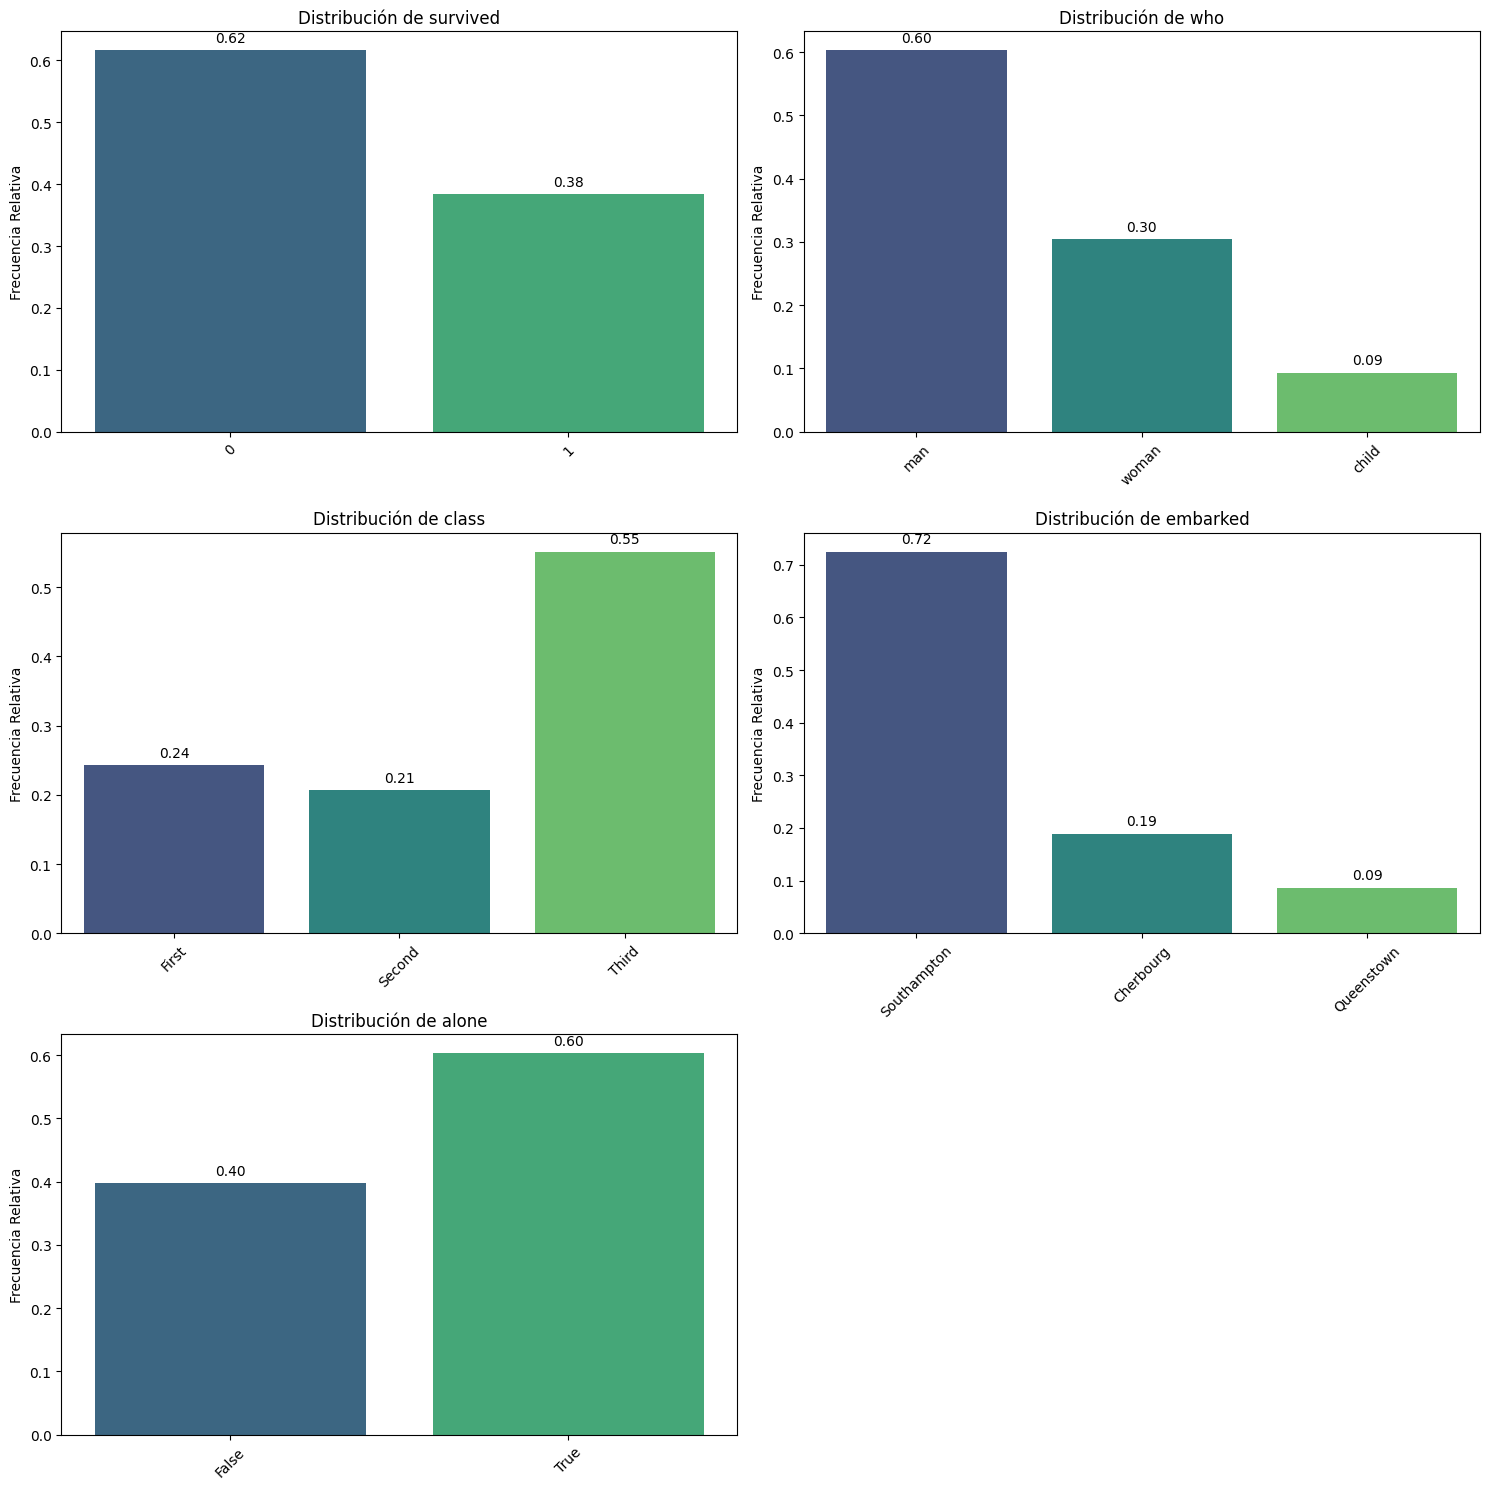

In [136]:
# Analizamos las frecuencias relativas:

pinta_distribucion_categoricas(df_titanic_clean3, categoricas,relativa= True, mostrar_valores= True)

### #2.2 Numéricas

In [139]:
 
 df_titanic_clean3[["age","fare"]].describe()

,age,fare
count,889.000000,889.000000
mean,29.680279,32.096681
std,12.982895,49.697504
min,0.420000,0.000000
25%,22.000000,7.895800
50%,30.000000,14.454200
75%,35.000000,31.000000
max,80.000000,512.329200


(2, 2)


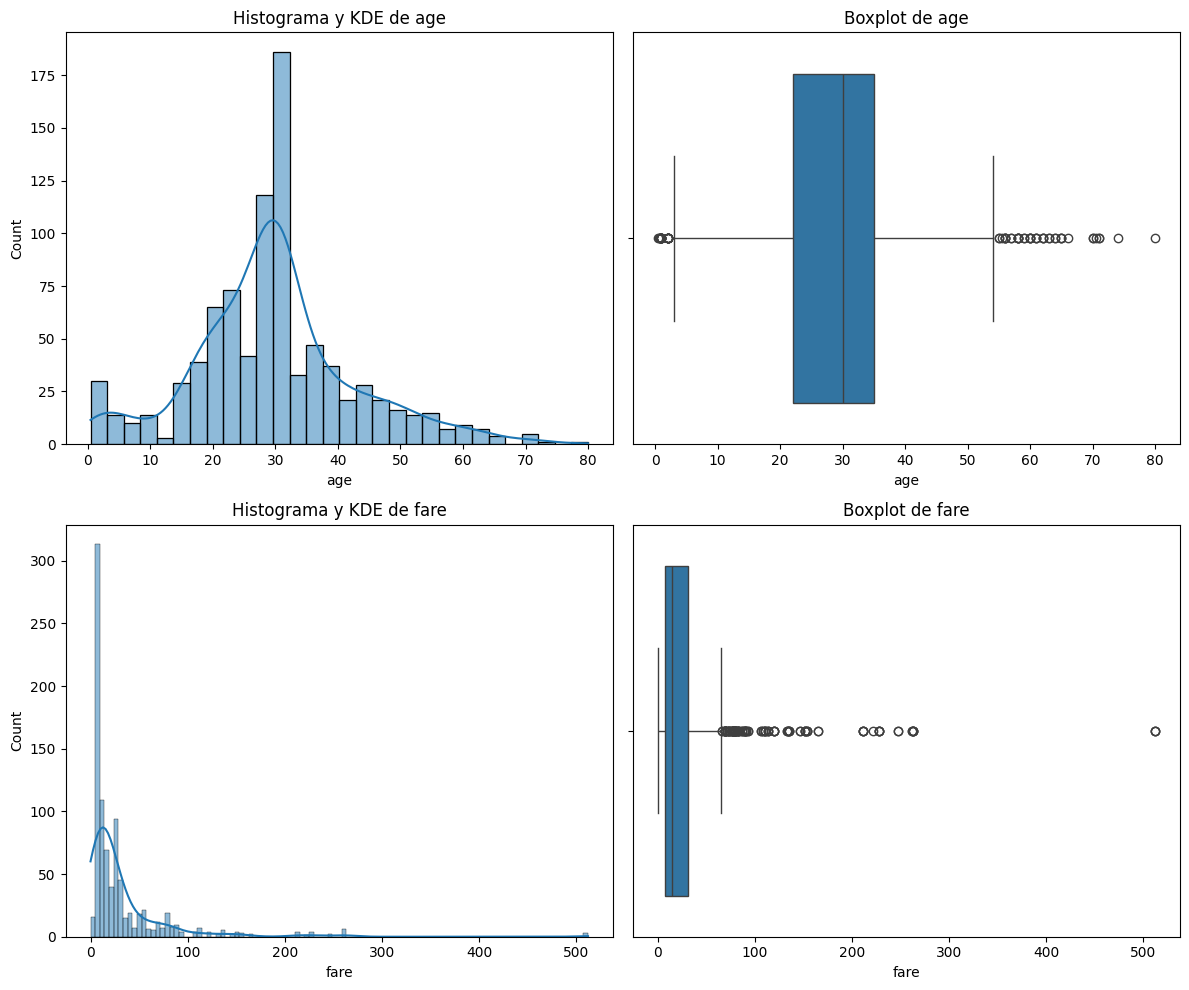

In [144]:
plot_combined_graphs(df_titanic_clean3, ["age","fare"])